In [1]:
import notebook_util
import cv2
from matplotlib import pyplot as plt
import numpy as np
notebook_util.override_imshow(cv2)

%matplotlib inline

Showing Image: Original


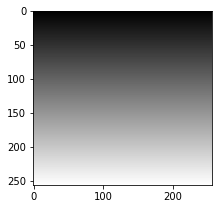

In [57]:
bw_gradient = np.tile(np.linspace(0,255, 256), (256, 1)).T.astype(np.uint8)
cv2.imshow("Original", bw_gradient)

Showing Image: 1 Threshold Binary - values go to 0 or 255 at the cutoff (80)


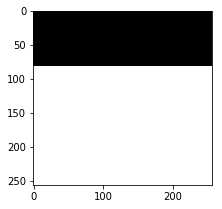

In [65]:
# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(bw_gradient, 80, 255, cv2.THRESH_BINARY)
cv2.imshow('1 Threshold Binary - values go to 0 or 255 at the cutoff (80)', thresh1)


Showing Image: 2 Threshold Binary Inverse


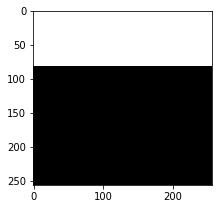

In [68]:
# Values below 127 go to 255 and values above 127 go to 0 (reverse of above)
ret,thresh2 = cv2.threshold(bw_gradient, 80, 255, cv2.THRESH_BINARY_INV)
cv2.imshow('2 Threshold Binary Inverse', thresh2)

Showing Image: 3 THRESH TRUNC -  Values above the cutoff go to 255. The rest is unchanged


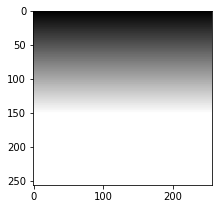

In [71]:

ret,thresh3 = cv2.threshold(bw_gradient, 150, 255, cv2.THRESH_TRUNC)
cv2.imshow('3 THRESH TRUNC -  Values above the cutoff go to 255. The rest is unchanged', thresh3)


Showing Image: 4 THRESH TOZERO - Values below the cutoff to to zero. The rest is unchenged


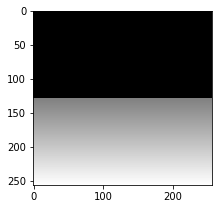

In [75]:
ret,thresh4 = cv2.threshold(bw_gradient, 127, 255, cv2.THRESH_TOZERO)
cv2.imshow('4 THRESH TOZERO - Values below the cutoff to to zero. The rest is unchenged', thresh4)

Showing Image: 5 THRESH TOZERO INV - Values above the cuttof go to zero. The rest is unchanged


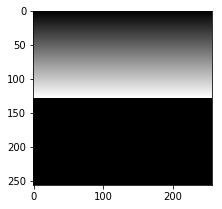

In [78]:
# Resever of above, below 127 is unchanged, above 127 goes to 0
ret,thresh5 = cv2.threshold(bw_gradient, 127, 255, cv2.THRESH_TOZERO_INV)
cv2.imshow('5 THRESH TOZERO INV - Values above the cuttof go to zero. The rest is unchanged', thresh5)

Showing Image: Original


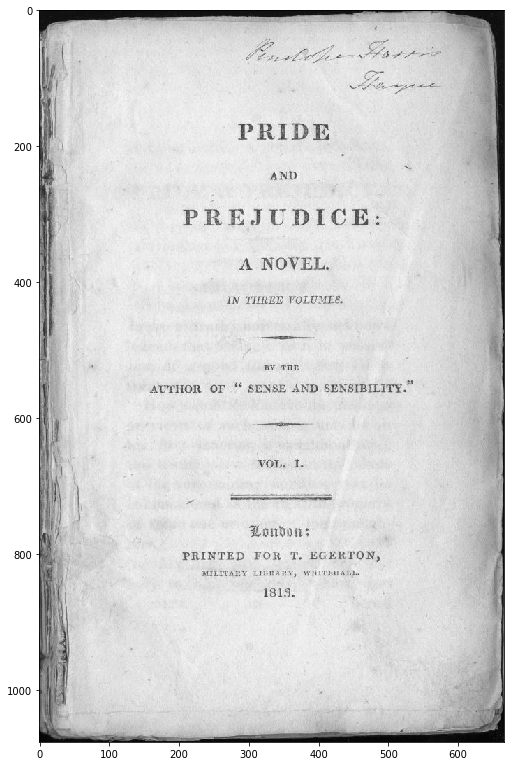

In [100]:
# Load our new image
image_data = cv2.imread('resources/book.jpg', 0)

cv2.imshow("Original", image_data)

Showing Image: Threshold Binary


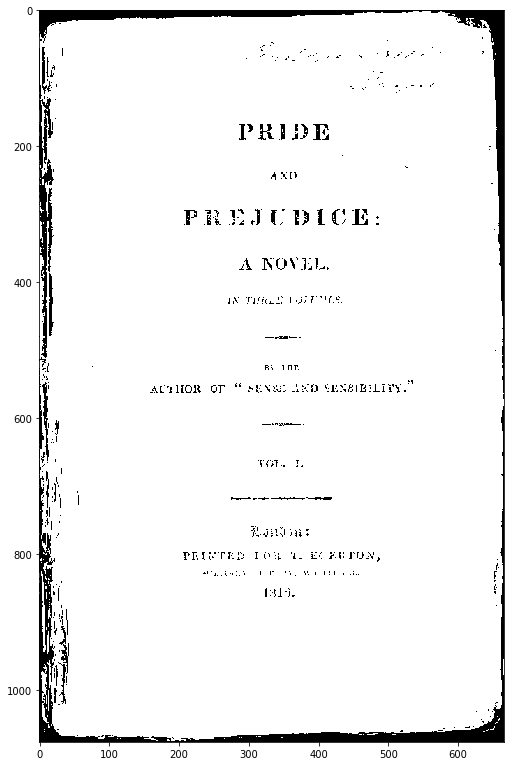

In [101]:
ret,thresh1 = cv2.threshold(image_data, 127, 255, cv2.THRESH_BINARY)
cv2.imshow('Threshold Binary', thresh1)


OpenCV implements some other thresholding techniques

**cv2.adaptiveThreshold**

Showing Image: Adaptive Mean Thresholding


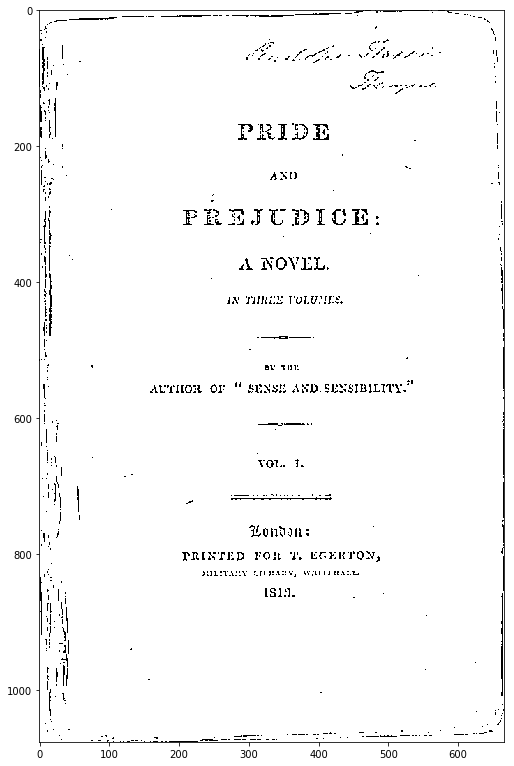

In [107]:
# It's good practice to blur images as it removes noise
image_data = cv2.GaussianBlur(image_data, (3, 3), 0)

# Using adaptiveThreshold
thresh = cv2.adaptiveThreshold(image_data, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                               cv2.THRESH_BINARY, 3, 5)

cv2.imshow("Adaptive Mean Thresholding", thresh) 

OTSU Thresholding

Showing Image: Otsu's Thresholding


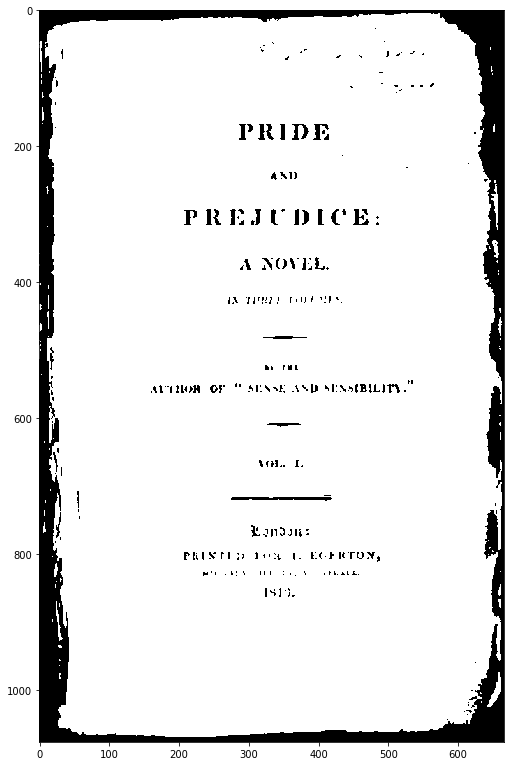

In [108]:
_, th2 = cv2.threshold(image_data, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imshow("Otsu's Thresholding", th2)

Showing Image: Guassian Otsu's Thresholding


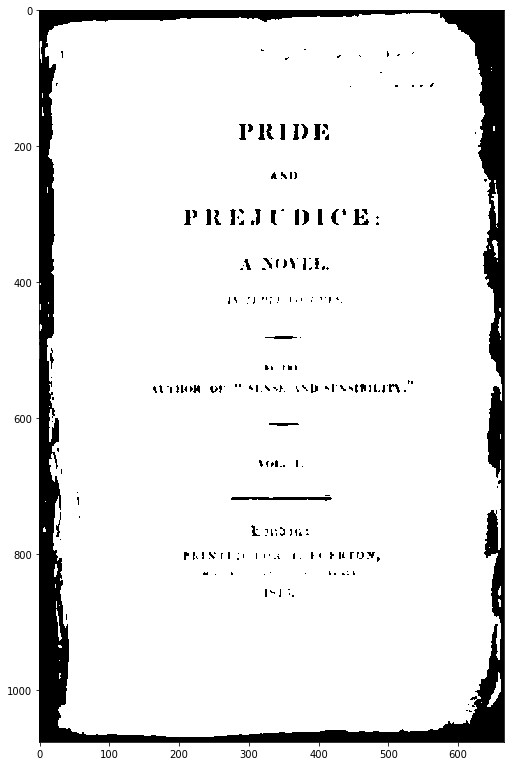

In [122]:
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(image_data, (3,3), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imshow("Guassian Otsu's Thresholding", th3)